In [ ]:
df = pd.read_csv('C:/desktop/intro to MLdatasets/penguins.csv')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins (5).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'penguins.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [1]:
df.tail()

NameError: name 'df' is not defined

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
df.shape

(344, 8)

Data Preprocessing

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
c = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','year']
for col in c:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [10]:
df = df.fillna(df.mode().iloc[0])
print(df.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [11]:
# to check the datatypes of the columns in the dataset
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [12]:
# converting the string datatypes to categorical (Species, island, sex)
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')
df['year'] = df['year'].astype('category')

df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                 category
dtype: object

Normalizing the data

In [13]:

f_n = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']

min_values = df[f_n].min()
max_values = df[f_n].max()

# Print min and max values
print("Min Values:\n",min_values)
print("\nMax Values:\n",max_values)


Min Values:
 bill_depth_mm          13.1
bill_length_mm         32.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

Max Values:
 bill_depth_mm          21.5
bill_length_mm         59.6
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64


In [14]:
for f in f_n:
    df[f] = (df[f] - df[f].min()) / (df[f].max() - df[f].min())

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female,2007
3,Adelie,Torgersen,0.449091,0.500000,0.423729,0.375000,male,2007
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female,2007


Encoding the data

In [15]:
prediction_target = 'sex'

feature_matrix = df.drop(columns=[prediction_target])

binary_target = np.array(df[prediction_target] == 'male', dtype=np.float32)

encoded_features = pd.get_dummies(feature_matrix, drop_first=True).to_numpy()

# Display the shapes of the target vector and feature matrix
shape_of_target = binary_target.shape
shape_of_features = encoded_features.shape

print("Shape of Target Vector:", shape_of_target)
print("Shape of Feature Matrix:", shape_of_features)


Shape of Target Vector: (344,)
Shape of Feature Matrix: (344, 10)


In [16]:
np.random.seed(42)

# Calculate the number of samples in the training set
num_samples = encoded_features.shape[0]
train_size = int(num_samples * 0.8)

indices = np.random.permutation(num_samples)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Splitting the data
X_train, y_train = encoded_features[train_indices], binary_target[train_indices]
X_test, y_test = encoded_features[test_indices], binary_target[test_indices]

# Checking the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((275, 10), (275,), (69, 10), (69,))

In [17]:
class LogitRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.params = None
        self.intercept = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.params = np.zeros(num_features)
        self.intercept = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.params) + self.intercept
            probabilities = self.sigmoid(linear_model)

            # Compute gradients
            d_params = (1 / num_samples) * np.dot(X.T, (probabilities - y))
            d_intercept = (1 / num_samples) * np.sum(probabilities - y)

            # Update parameters
            self.params -= self.learning_rate * d_params
            self.intercept -= self.learning_rate * d_intercept

            # Calculate and store loss
            loss = self.log_loss(y, probabilities)
            self.loss_history.append(loss)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def log_loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def predict(self, X):
        linear_model = np.dot(X, self.params) + self.intercept
        probabilities = self.sigmoid(linear_model)
        predictions = [1 if i > 0.5 else 0 for i in probabilities]
        return np.array(predictions)


In [18]:
model_config = {
    "learning_rate": 1e-6,
    "num_iterations": 100000
}
logistic_model = LogitRegression(**model_config)

# Training the model with the training data
logistic_model.fit(X_train, y_train)

# Generating predictions on the test set
predictions_test = logistic_model.predict(X_test)

# Computing the accuracy of the model
correct_predictions = np.sum(predictions_test == y_test)
total_predictions = len(y_test)
model_accuracy = correct_predictions / total_predictions
print("Model Accuracy on Test Set:", model_accuracy)

# Displaying the initial and final loss values
initial_loss, final_loss = logistic_model.loss_history[0], logistic_model.loss_history[-1]
print("Initial Loss Value:", initial_loss)
print("Final Loss Value:", final_loss)


Model Accuracy on Test Set: 0.4927536231884058
Initial Loss Value: 0.6931471805599453
Final Loss Value: 0.6921861143386383


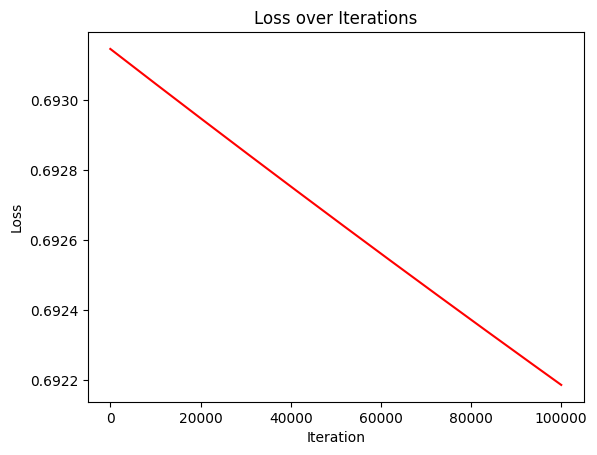

In [20]:
plt.plot(logistic_model.loss_history, color='red')
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [21]:
# Setting up the logistic regression model
model_config = {
    "learning_rate": 0.01,
    "num_iterations": 5000
}
logistic_model = LogitRegression(**model_config)

# Training the model with the training data
logistic_model.fit(X_train, y_train)

# Generating predictions on the test set
predictions_test = logistic_model.predict(X_test)

# Computing the accuracy of the model
correct_predictions = np.sum(predictions_test == y_test)
total_predictions = len(y_test)
model_accuracy = correct_predictions / total_predictions
print("Model Accuracy on Test Set:", model_accuracy)

# Displaying the initial and final loss values
initial_loss, final_loss = logistic_model.loss_history[0], logistic_model.loss_history[-1]
print("Initial Loss Value:", initial_loss)
print("Final Loss Value:", final_loss)


Model Accuracy on Test Set: 0.8405797101449275
Initial Loss Value: 0.6931471805599453
Final Loss Value: 0.5637800018015605


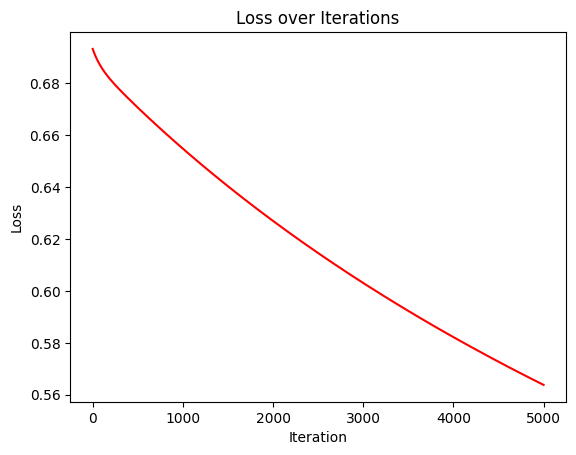

In [22]:
plt.plot(logistic_model.loss_history, color='red')
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


In [23]:
# Setting up the logistic regression model
model_config = {
    "learning_rate": 0.001,
    "num_iterations": 5000
}
logistic_model = LogitRegression(**model_config)

# Training the model with the training data
logistic_model.fit(X_train, y_train)

# Generating predictions on the test set
predictions_test = logistic_model.predict(X_test)

# Computing the accuracy of the model
correct_predictions = np.sum(predictions_test == y_test)
total_predictions = len(y_test)
model_accuracy = correct_predictions / total_predictions
print("Model Accuracy on Test Set:", model_accuracy)

# Displaying the initial and final loss values
initial_loss, final_loss = logistic_model.loss_history[0], logistic_model.loss_history[-1]
print("Initial Loss Value:", initial_loss)
print("Final Loss Value:", final_loss)


Model Accuracy on Test Set: 0.4927536231884058
Initial Loss Value: 0.6931471805599453
Final Loss Value: 0.670544909019657


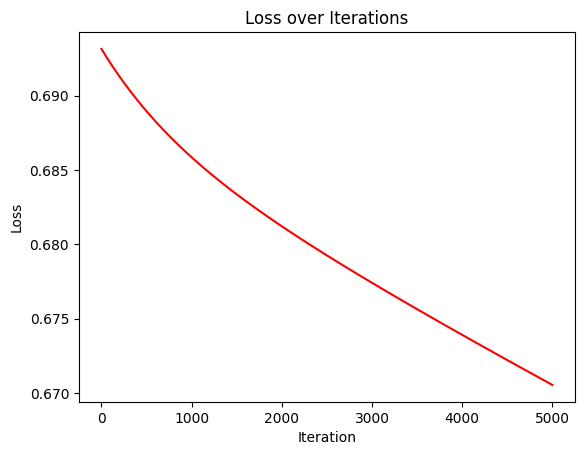

In [24]:
plt.plot(logistic_model.loss_history, color='red')
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
